Starting Learning with b = 0, m = 0, error = 5565.107834483211
After Learning final b = 0.08893651993741344, m = 1.4777440851894448, error = 112.61481011613473


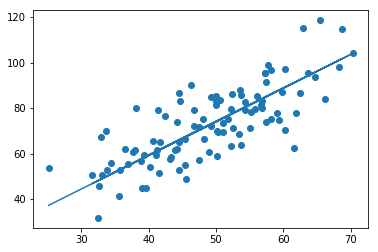

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def predict(x, b, m):
    return [(m * x_val + b) for x_val in x]
def calculate_error(points, b, m):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        pred = m * x + b
        error = (pred - y) ** 2
        total_error += error
    return total_error/float(len(points))


def step_gradient(points, b_current, m_current, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * (y - ((m_current * x) + b_current)) * x
    new_b = b_current - learning_rate * b_gradient
    new_m = m_current - learning_rate * m_gradient
    return [new_b, new_m]

def gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    for i in range(num_iterations):
        [b, m] = step_gradient(points, b, m, learning_rate) 
    return [b, m]

def run():
    points = np.genfromtxt("data.csv", delimiter=",")
    np_points = np.array(points)
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    learning_rate = 0.0001
    
    print("Starting Learning with b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, calculate_error(points, initial_b, initial_m)))
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After Learning final b = {0}, m = {1}, error = {2}".format(b, m, calculate_error(points, b, m)))
    plt.scatter(np_points[:,0], np_points[:, 1])
    plt.plot(np_points[:,0], predict(np_points[:,0], b, m))
    plt.show()
    
run()    